<a href="https://colab.research.google.com/github/lillianpoland/hi-class/blob/main/LillPolaU7Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 7 Project: Polynomials, Splines, and GPs, Oh my!



##Context

Penguins are really cool and cute birds. They live in cold environments and have adapted to this environment through their thick blubber, which provides insulation. Their blubber and body mass changes significantly due to external factors such as diet, habitat, and predators who force them to swim away faster and get buff. These outside factors impact flipper length, bill depth, and bill length which I hypothesize will have the most impact on body mass.
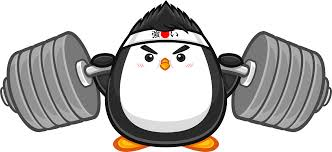

In [ ]:
!pip install preliz
!pip install bambi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 978.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.1/517.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

In [ ]:
Penguins = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/penguins.csv').dropna()

In [ ]:
Penguins

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.750,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.800,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.250,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.450,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.650,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,5.58,1.98,20.7,4.000,male,2009
340,Chinstrap,Dream,4.35,1.81,20.2,3.400,female,2009
341,Chinstrap,Dream,4.96,1.82,19.3,3.775,male,2009
342,Chinstrap,Dream,5.08,1.90,21.0,4.100,male,2009


##Variable Selection

I will start by creating scatterplots to see if my hypothesis that bill length, bill depth, and/or flipper length will have the most impact on the body mass. These models will help me visualize the patterns in a simpler way which makes it easier to compare models.

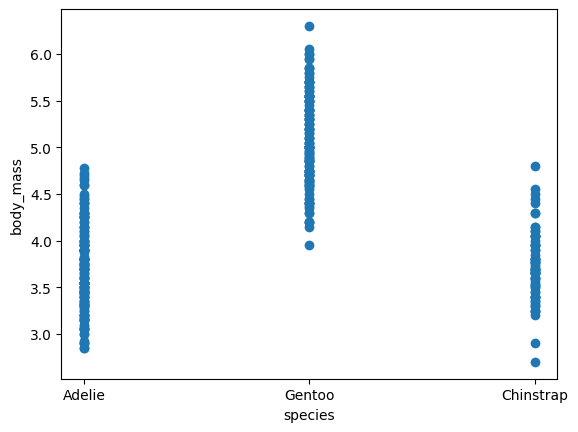

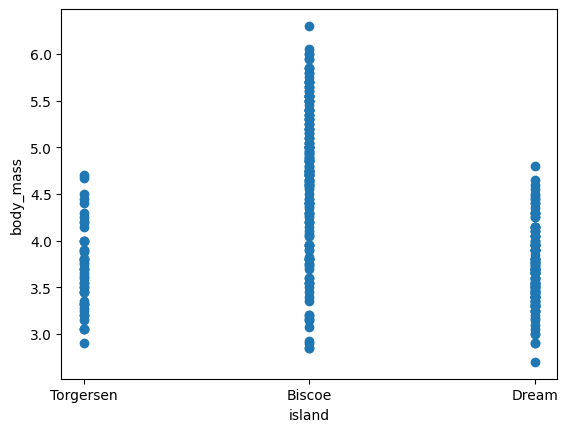

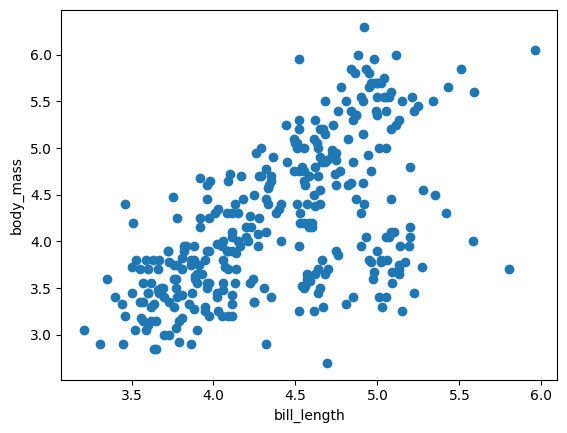

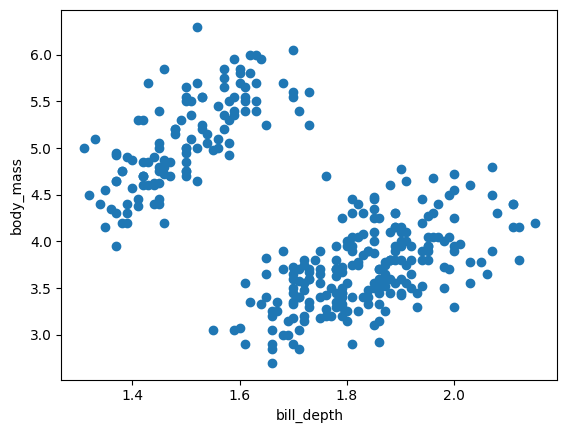

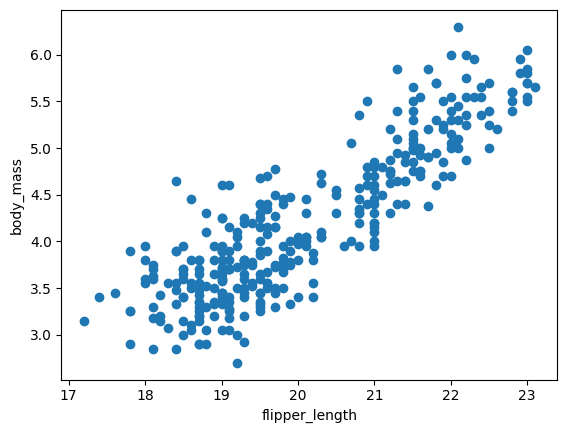

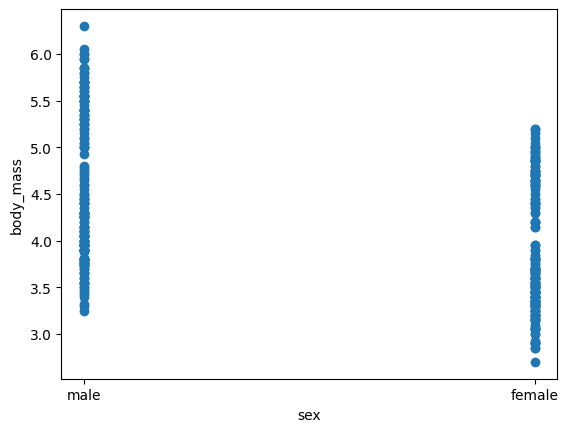

In [ ]:
x = ["species", "island", "bill_length", "bill_depth", "flipper_length", "sex"]
y = "body_mass"
for a in x:
  plt.scatter(Penguins[a], Penguins[y])
  plt.xlabel(a)
  plt.ylabel(y)
  plt.show()

These scatterplots help me visualize the patterns for the different variables. It is clear that while there is some variation for male and female, the trend is not significant (males tend to have slightly higher body mass overall). Similarly, the Biscoe Island and Gentoo species tend to have higher body mass, whereas the other 2 islands and species are about the same as each other. Bill depth shows more of a trend than the previous variables, but has some weird spacing, with some smaller bill depths having similar body mass to larger bill depths. Bill length shows even more of an increasing pattern, with longer bills having higher body mass. Ultimately, the scatterplots show us that flipper length has the most cohesive upward trend with body mass, making it clear that longer flippers equates to higher body mass. This is not suprising.

Now, I will compare models with flipper length, bill length, and bill depth, with the occasional inclusion of species as a variable to see if it might make an impact.

In [ ]:
model = bmb.Model("body_mass ~ flipper_length + bill_length", Penguins)
idata = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [ ]:
model_2 = bmb.Model("body_mass ~ flipper_length + bill_length + bill_depth", Penguins)
idata_2 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [ ]:
model_3 = bmb.Model("body_mass ~ flipper_length + bill_length + species", Penguins)
idata_3 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [ ]:
model_4 = bmb.Model("body_mass ~ flipper_length + bill_length + bill_depth + species", Penguins)
idata_4 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [ ]:
compare = az.compare({"fl + bl": idata, "+ bd": idata_2, "+ species": idata_3, "+ bd + species": idata_4})
compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
+ bd,0,-164.262331,3.770301,0.000000,1.000000e+00,13.058441,0.000000,False,log
+ bd + species,1,-164.273618,3.781155,0.011288,1.887379e-15,13.033385,0.069283,False,log
fl + bl,2,-164.330878,3.842090,0.068547,0.000000e+00,13.023517,0.073374,False,log
+ species,3,-164.409210,3.906703,0.146879,0.000000e+00,13.029404,0.034262,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

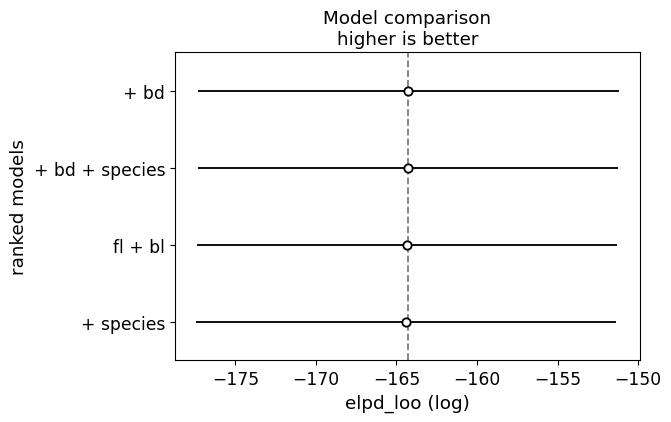

In [ ]:
az.plot_compare(compare)

The elpd_loo is showing that the different variations are pretty similar, so I will focus on analyzing flipper length and bill length, as it aligns most with my initial findings from the scatterplot.

##Model selection

In [ ]:
model = bmb.Model("body_mass ~ flipper_length + bill_length", Penguins)
idata = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [ ]:
model_2 = bmb.Model("body_mass ~ poly(flipper_length + bill_length, degree=2)", Penguins)
idata_2 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [ ]:
model_3 = bmb.Model("body_mass ~ poly(flipper_length + bill_length, degree=3)", Penguins)
idata_3 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [ ]:
model_4 = bmb.Model("body_mass ~ bs(flipper_length + bill_length, degree=1, df=10)", Penguins)
idata_4 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [ ]:
model_5 = bmb.Model("body_mass ~ hsgp(flipper_length + bill_length, m=10, c=1.5)", Penguins)
idata_5 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [ ]:
compare = az.compare({"linear": idata, "quadratic": idata_2, "cubic": idata_3, "b spline": idata_4, "hsgp": idata_5})
compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
quadratic,0,-164.138520,3.669968,0.000000,1.000000e+00,13.071027,0.000000,False,log
cubic,1,-164.247336,3.753216,0.108817,0.000000e+00,13.022048,0.056492,False,log
hsgp,2,-164.331786,3.845421,0.193266,3.645018e-16,13.038833,0.059852,False,log
linear,3,-164.345957,3.832751,0.207437,0.000000e+00,13.013908,0.069010,False,log
b spline,4,-164.378276,3.883436,0.239756,2.220446e-16,13.041869,0.038009,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

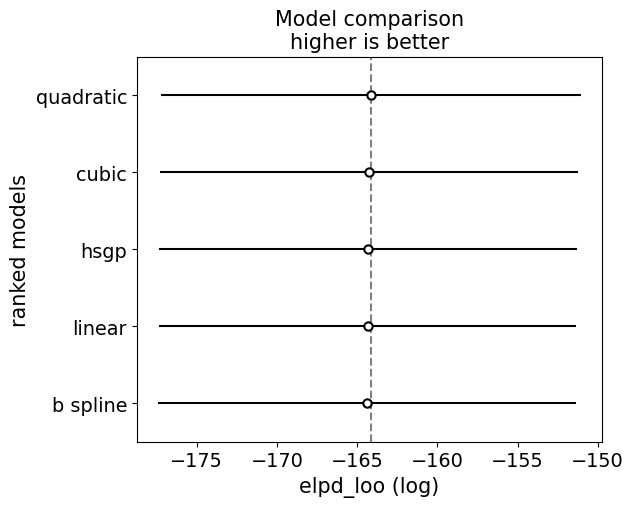

In [ ]:
az.plot_compare(compare)

They all look pretty much the same, and I am really interested in the b spline, so I want to attempt that. Technically, the elpd_loo shows that b spline is the lowest performing, but just barely. The quadratic would be best, but after reading the notes, b splines really interested me, so I wanted to explore that more. 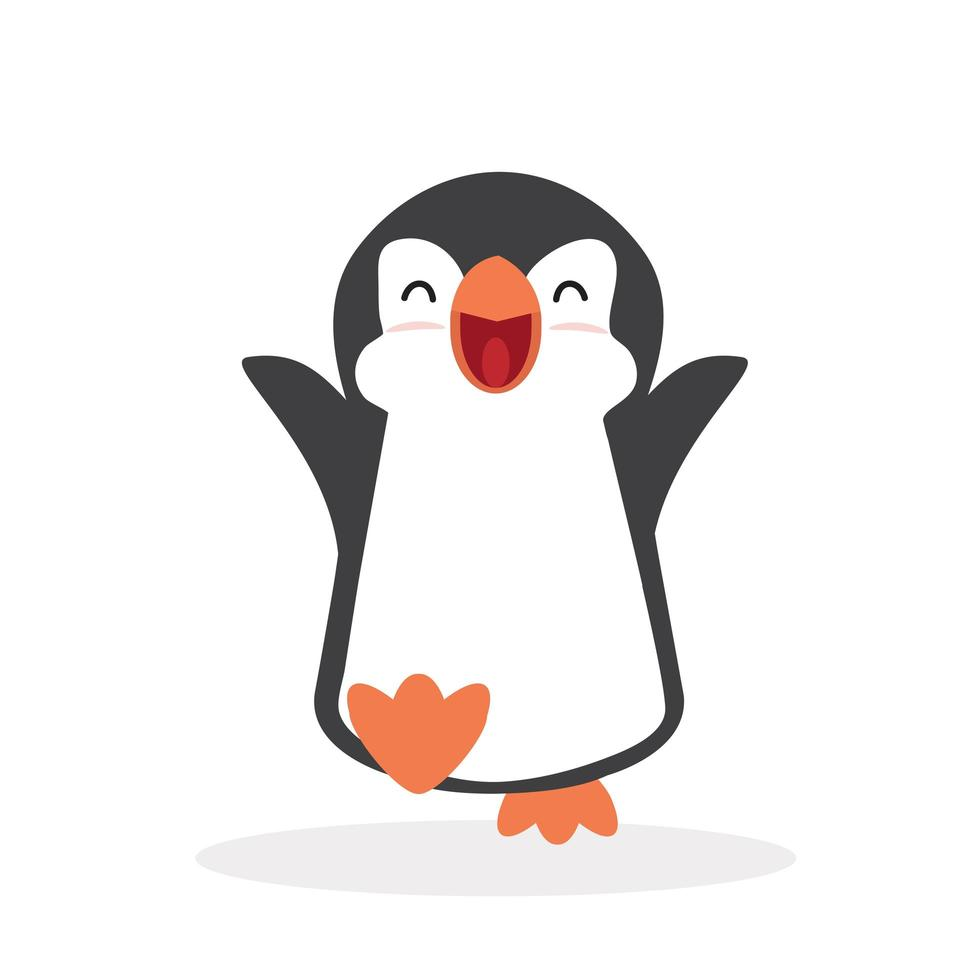

##Final model

Now I am going to make my b spline models with the 3 different variables.

In [ ]:
num_knots = 6
knots = np.linspace(Penguins["flipper_length"].min(), Penguins["flipper_length"].max(), num_knots + 2)[1:-1]
model_spline = bmb.Model("body_mass ~ bs(flipper_length, degree=3, knots=knots)", Penguins, family="gaussian")
idata_spline = model_spline.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


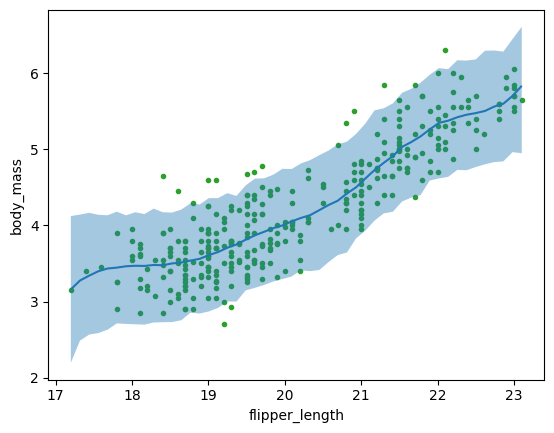

In [ ]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "flipper_length", pps= True)
plt.plot(Penguins.flipper_length, Penguins.body_mass, "C2.", zorder=-3)

In [ ]:
num_knots = 6
knots = np.linspace(Penguins["bill_length"].min(), Penguins["bill_length"].max(), num_knots + 2)[1:-1]
model_spline = bmb.Model("body_mass ~ bs(bill_length, degree=3, knots=knots)", Penguins, family="gaussian")
idata_spline = model_spline.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


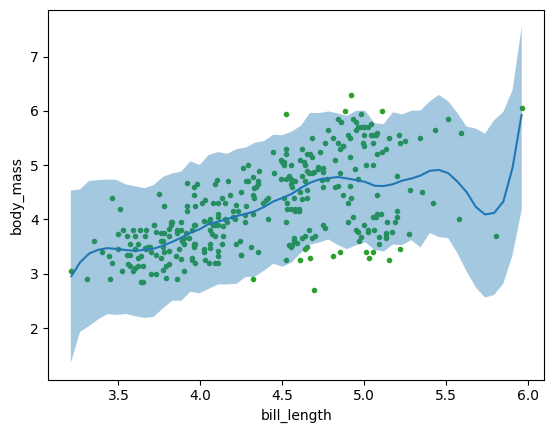

In [ ]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "bill_length", pps= True)
plt.plot(Penguins.bill_length, Penguins.body_mass, "C2.", zorder=-3)

In [ ]:
num_knots = 6
knots = np.linspace(Penguins["bill_depth"].min(), Penguins["bill_depth"].max(), num_knots + 2)[1:-1]
model_spline = bmb.Model("body_mass ~ bs(bill_depth, degree=3, knots=knots)", Penguins, family="gaussian")
idata_spline = model_spline.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


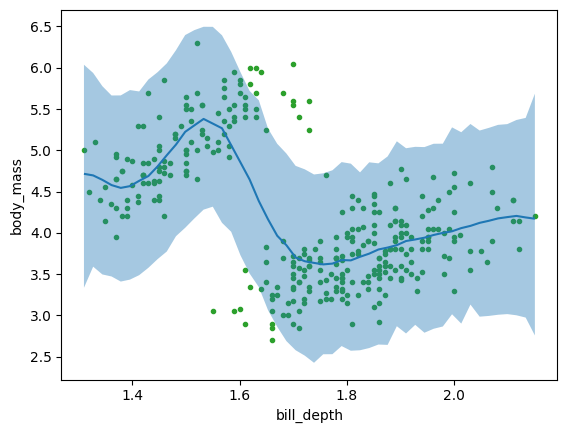

In [ ]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "bill_depth", pps= True)
plt.plot(Penguins.bill_depth, Penguins.body_mass, "C2.", zorder=-3)

##Conclusion

The B spline models look pretty good, with the middle line following the patterns of all the different variables very well. There are some outliers, which could have been prevented if I had done a quadratic model. But, the b splines look pretty good overall. My data has some pretty weird curves, which b splines capture very well, it is one of their strengths! So, I think my final models look pretty good and show my suspected patterns.